In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [270]:
lrpd = pd.read_csv("../data/lrpd-clean.csv")
lrpd = lrpd.set_index("INCIDENT_NUMBER")

In [271]:
lrpd.head()

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,CRIME_TYPE,RISK_TYPE
INCIDENT_NUMBER,,,,,,,,,,
2021-092971,2021-08-04 10:21:00,72.0,THEFT FROM MOTOR VEHICLE,UNKNOWN,15601 KANIS RD,72204.0,0.000000,0.000000,Non-Violent Crime,Low Risk
2017-029450,2017-03-16 18:30:00,82.0,THEFT OF MOTOR VEHICLE PARTS,UNKNOWN,10801 IRONTON CUTOFF RD,72206.0,34.649362,-92.301959,Non-Violent Crime,Low Risk
2017-156453,2017-09-01 12:00:00,53.0,RAPE,UNKNOWN,0,0.0,0.000000,0.000000,Violent Crime,High Risk
2019-130717,2019-10-17 21:00:00,51.0,RAPE,UNKNOWN,0,0.0,0.000000,0.000000,Violent Crime,High Risk
2020-073313,2020-07-02 19:10:00,50.0,RAPE,UNKNOWN,0,0.0,0.000000,0.000000,Violent Crime,High Risk


### Question: What Year had the most amount of crime, and how many crimes occurred that year?

In [272]:
yearly_crimes = pd.DataFrame({'Year': [], 'Crimes': []})

In [273]:
lrpd["INCIDENT_DATE"] = pd.to_datetime(lrpd["INCIDENT_DATE"])

In [274]:
for year in lrpd["INCIDENT_DATE"].dt.year.unique():
    yearly_data = lrpd.loc[lrpd["INCIDENT_DATE"].dt.year == year]
    yearly_crime = yearly_data["OFFENSE_DESCRIPTION"].value_counts().sum()

    yearly_crimes.loc[len(yearly_crimes.index)] = [year, yearly_crime]

In [275]:
yearly_crimes = yearly_crimes.set_index("Year").sort_index()
yearly_crimes

,Crimes
Year,
2017,16212
2018,15141
2019,14415
2020,12247
2021,13670
2022,11016


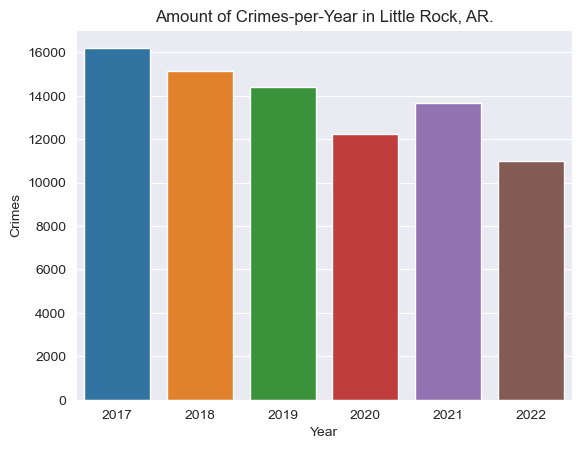

In [276]:
sns.barplot(data=yearly_crimes, x=yearly_crimes.index, y=yearly_crimes["Crimes"])
plt.title("Amount of Crimes-per-Year in Little Rock, AR.")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.show()
plt.show()

### Answer: 2017, ~16,000

### Question: What were the most common Violent Crimes? Non-Violent?

In [277]:
violent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })
nonviolent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })

violent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Violent Crime"]
for offense in violent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = violent_offenses.loc[violent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    violent_crime_occurrence.loc[len(violent_crime_occurrence.index)] = [offense, occurrence]

nonviolent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Non-Violent Crime"]
for offense in nonviolent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = nonviolent_offenses.loc[nonviolent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    nonviolent_crime_occurrence.loc[len(nonviolent_crime_occurrence.index)] = [offense, occurrence]

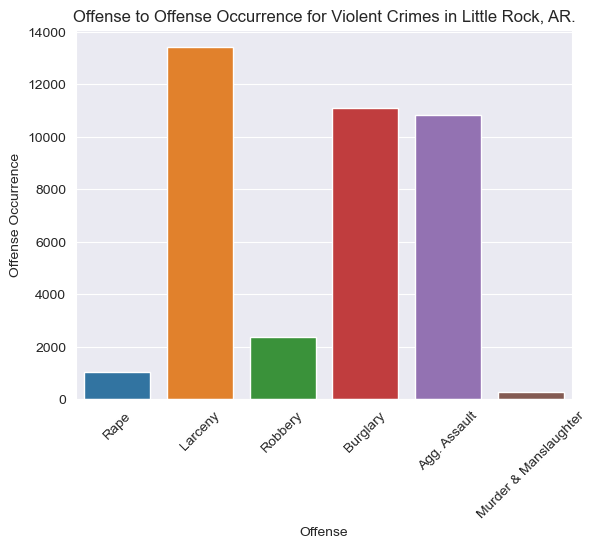

In [278]:
ax = sns.barplot(data=violent_crime_occurrence, x=["Rape", "Larceny", "Robbery", "Burglary", "Agg. Assault", "Murder & Manslaughter"], y=violent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

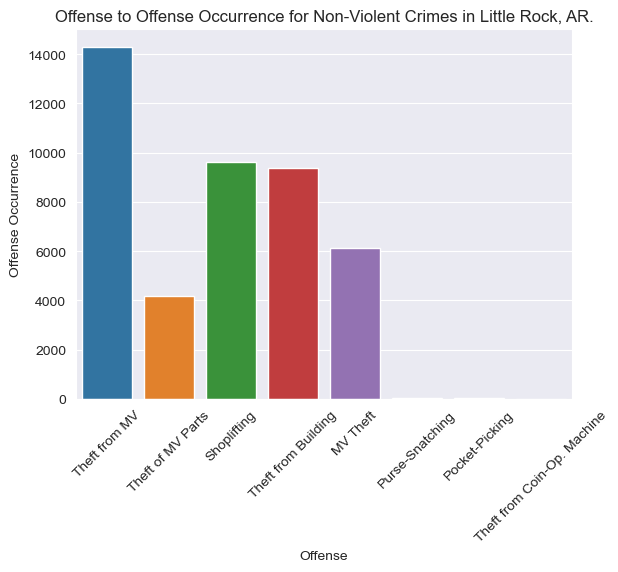

In [279]:
ax = sns.barplot(data=nonviolent_crime_occurrence, x=["Theft from MV", "Theft of MV Parts", "Shoplifting", "Theft from Building", "MV Theft", "Purse-Snatching", "Pocket-Picking", "Theft from Coin-Op. Machine"], y=nonviolent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Non-Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

### Answer: Violent - Larceny, Non-Violent - Theft from MV

### Question: What Zip had the most crimes?

In [280]:
zips = lrpd["ZIP"].unique()
zips

array([72204., 72206.,     0., 72211., 72202., 72209., 72210., 72103.,
       72002., 72070., 72205., 72223., 72207., 72201., 72227., 72114.,
       72122., 72212., 72019., 72225., 72087., 72023., 72116., 72120.,
       72117., 72076., 72118., 72113., 72135., 72111., 72203., 72005.,
       72217., 72143.])

In [287]:
zip_offense_counts = pd.DataFrame({ "Zip": [], "Offense Count": []})

for zip in zips:
    data = lrpd.loc[lrpd["ZIP"] == zip]
    crimes = data["OFFENSE_DESCRIPTION"].value_counts().sum()

    zip_offense_counts.loc[len(zip_offense_counts.index)] = [zip, crimes]

zip_offense_counts.set_index("Zip").sort_values(by="Offense Count")

,Offense Count
Zip,
72143.0,1.0
72005.0,1.0
72111.0,1.0
72135.0,1.0
72023.0,1.0
72070.0,1.0
72087.0,1.0
72217.0,1.0
72203.0,2.0


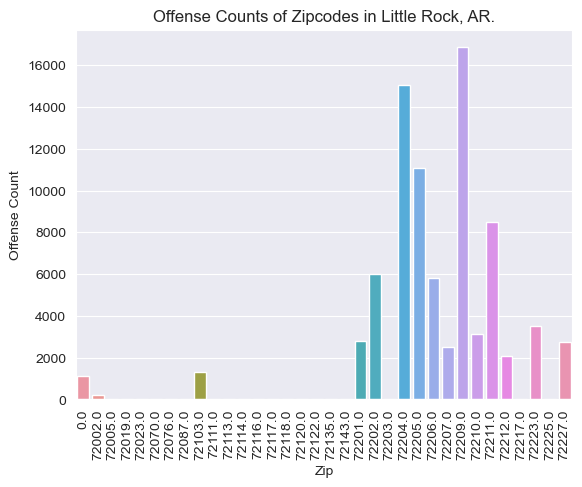

In [301]:
ax = sns.barplot(data=zip_offense_counts, x=zip_offense_counts["Zip"], y=zip_offense_counts["Offense Count"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Offense Counts of Zipcodes in Little Rock, AR.")
plt.xlabel("Zip")
plt.ylabel("Offense Count")
plt.show()

### Answer: Zip 72209 had 16k+ crimes.

### Question: What weapons were used the most in Violent Crimes?